In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [2]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

In [3]:
import numpy as np
# 샘플에 편향을 추가한다.
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [8]:
#결과를 일정하게 하기 위해 랜덤시드
np.random.seed(2042)
print(len(X))
print(X_with_bias)

150
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]
 [1.  1.5 0.2]
 [1.  1.6 0.2]
 [1.  1.4 0.1]
 [1.  1.1 0.1]
 [1.  1.2 0.2]
 [1.  1.5 0.4]
 [1.  1.3 0.4]
 [1.  1.4 0.3]
 [1.  1.7 0.3]
 [1.  1.5 0.3]
 [1.  1.7 0.2]
 [1.  1.5 0.4]
 [1.  1.  0.2]
 [1.  1.7 0.5]
 [1.  1.9 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.4]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.2]
 [1.  1.5 0.4]
 [1.  1.5 0.1]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.2 0.2]
 [1.  1.3 0.2]
 [1.  1.4 0.1]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.3 0.3]
 [1.  1.3 0.3]
 [1.  1.3 0.2]
 [1.  1.6 0.6]
 [1.  1.9 0.4]
 [1.  1.4 0.3]
 [1.  1.6 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]
 [1.  3.5 1. ]
 [1.  4.2 1.5]
 [1.  4.  1. ]
 [1.  4.7 1.4]
 [1.  3.6 1.3]
 [1.  4.4 1.4]
 [1.  

In [5]:
# 사이킷런의 train_test_split() 함수를 쓰지않고 테스트 트레인세트 분리.
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [9]:
# 타깃클래스의 확률을 one hot encoding 으로 표현한다.
# ex ) 해당 클래스가 1 이면 ( 0 , 1 , 0) 2이면 (0 , 0 , 1)
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [10]:
#훈련 세트와 테스트 세트의 타깃 클래스 확률을 담은 행렬을 만듬
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [11]:
# 소프트맥스 만드는 함수.
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [12]:
# 입력 개수와 출력 개수를 정한다.
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

In [13]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

# 소프트 맥스 모델 훈련
Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 2.4618322572793834
500 0.8960100494383187
1000 0.7194308091680076
1500 0.6187837145478177
2000 0.5554100567057791
2500 0.5116324543128722
3000 0.4791389679720147
3500 0.45369533024038217
4000 0.4329611307846497
4500 0.41554724919679975
5000 0.4005783959354107


In [ ]:
Theta

In [15]:
# 검증 세트에 대한 예측과 정확도 파악.
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [16]:
## 규제를 추가한 모델 훈련
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients



0 2.3556685869611
500 0.5017033519259047
1000 0.49397488965900627
1500 0.4910081943276672
2000 0.4897766661854226
2500 0.4892455164868965
3000 0.4890113354188057
3500 0.48890667912737373
4000 0.48885950299831016
4500 0.48883811774928476
5000 0.48882838777241155


In [17]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score


1.0

In [19]:
## 반복된 검증세트에서 손실을 계산해 오차가 증가하면 조기 종료 를 추가하였따!
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 2.132036398957862
500 0.5619816415670611
1000 0.5406649010795692
1500 0.5347019656780604
2000 0.5329521475836086
2500 0.5325587804998732
2642 0.5325462533423048
2643 0.532546253758585 조기 종료!


In [20]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

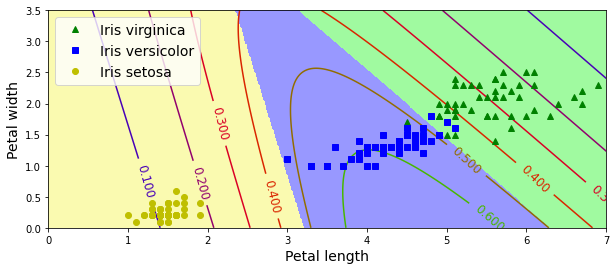

In [22]:
# 그래프로 확인
from matplotlib import pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [23]:
#테스트 셋
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score


0.9333333333333333